<a href="https://colab.research.google.com/github/nicolasyannick/wine-quality-pca-mlr/blob/main/Wine_Quality_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Connection to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load the important libraries

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')


<h3>Importing the Wine Quality Dataset<h3>

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


## Preparation of the Dataset

In [ ]:
# Converting the Quality in a binary class
# if 0 < quality <= 5 : 0
# if 5 < quality <= 10 : 1


threshold = 5
df['quality_class'] = (df['quality']>threshold).astype(int)


# Drop the "Id" and "quality" columns
df.drop(columns=['Id','quality'], inplace=True)


In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


## Dataset Imbalance

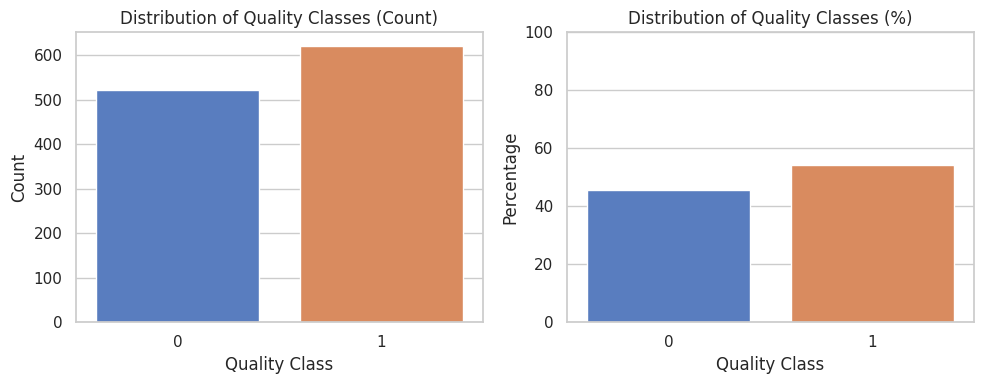

In [ ]:
sns.set(style='whitegrid')

quality_class_count = df['quality_class'].value_counts()
quality_class_percentage = df['quality_class'].value_counts(normalize=True) * 100

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.countplot(data=df, x='quality_class', palette='muted', ax=axes[0])
axes[0].set_title('Distribution of Quality Classes (Count)')
axes[0].set_xlabel('Quality Class')
axes[0].set_ylabel('Count')

sns.barplot(x=quality_class_percentage.index, y=quality_class_percentage.values, palette='muted', ax=axes[1])
axes[1].set_title('Distribution of Quality Classes (%)')
axes[1].set_xlabel('Quality Class')
axes[1].set_ylabel('Percentage')
axes[1].set_ylim(0, 100)

# Adjust layout to prevent overlapping of titles
plt.tight_layout()

# Show the plots
plt.show()

## Feature Correlation

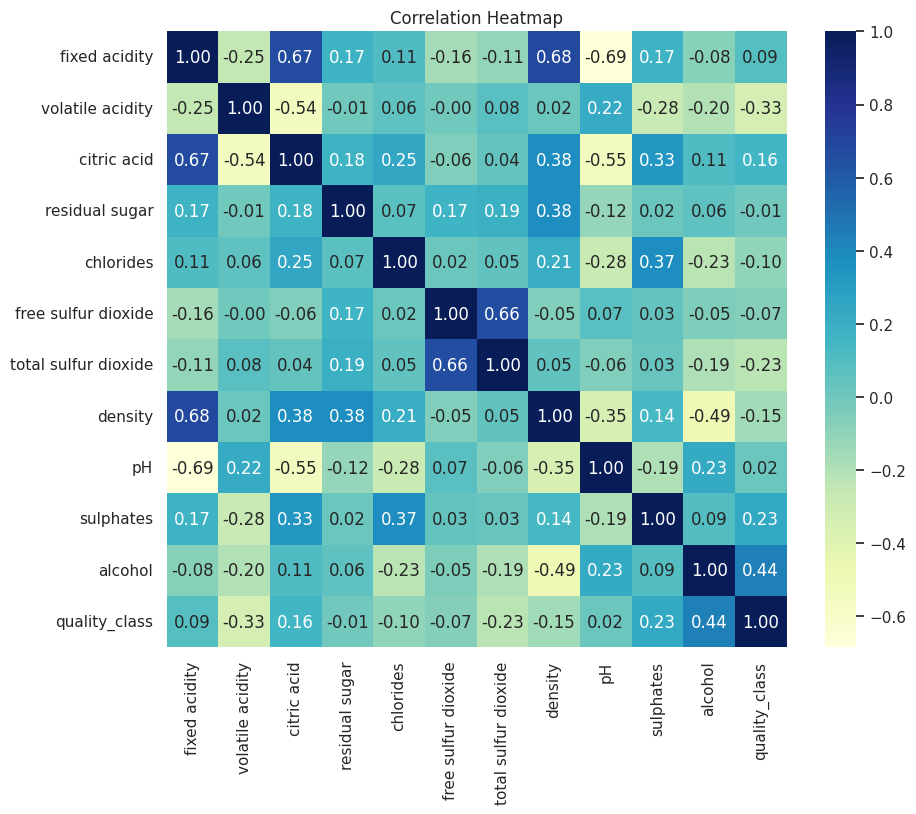

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap="YlGnBu")
plt.title('Correlation Heatmap')
plt.show()

## Distribution Plots

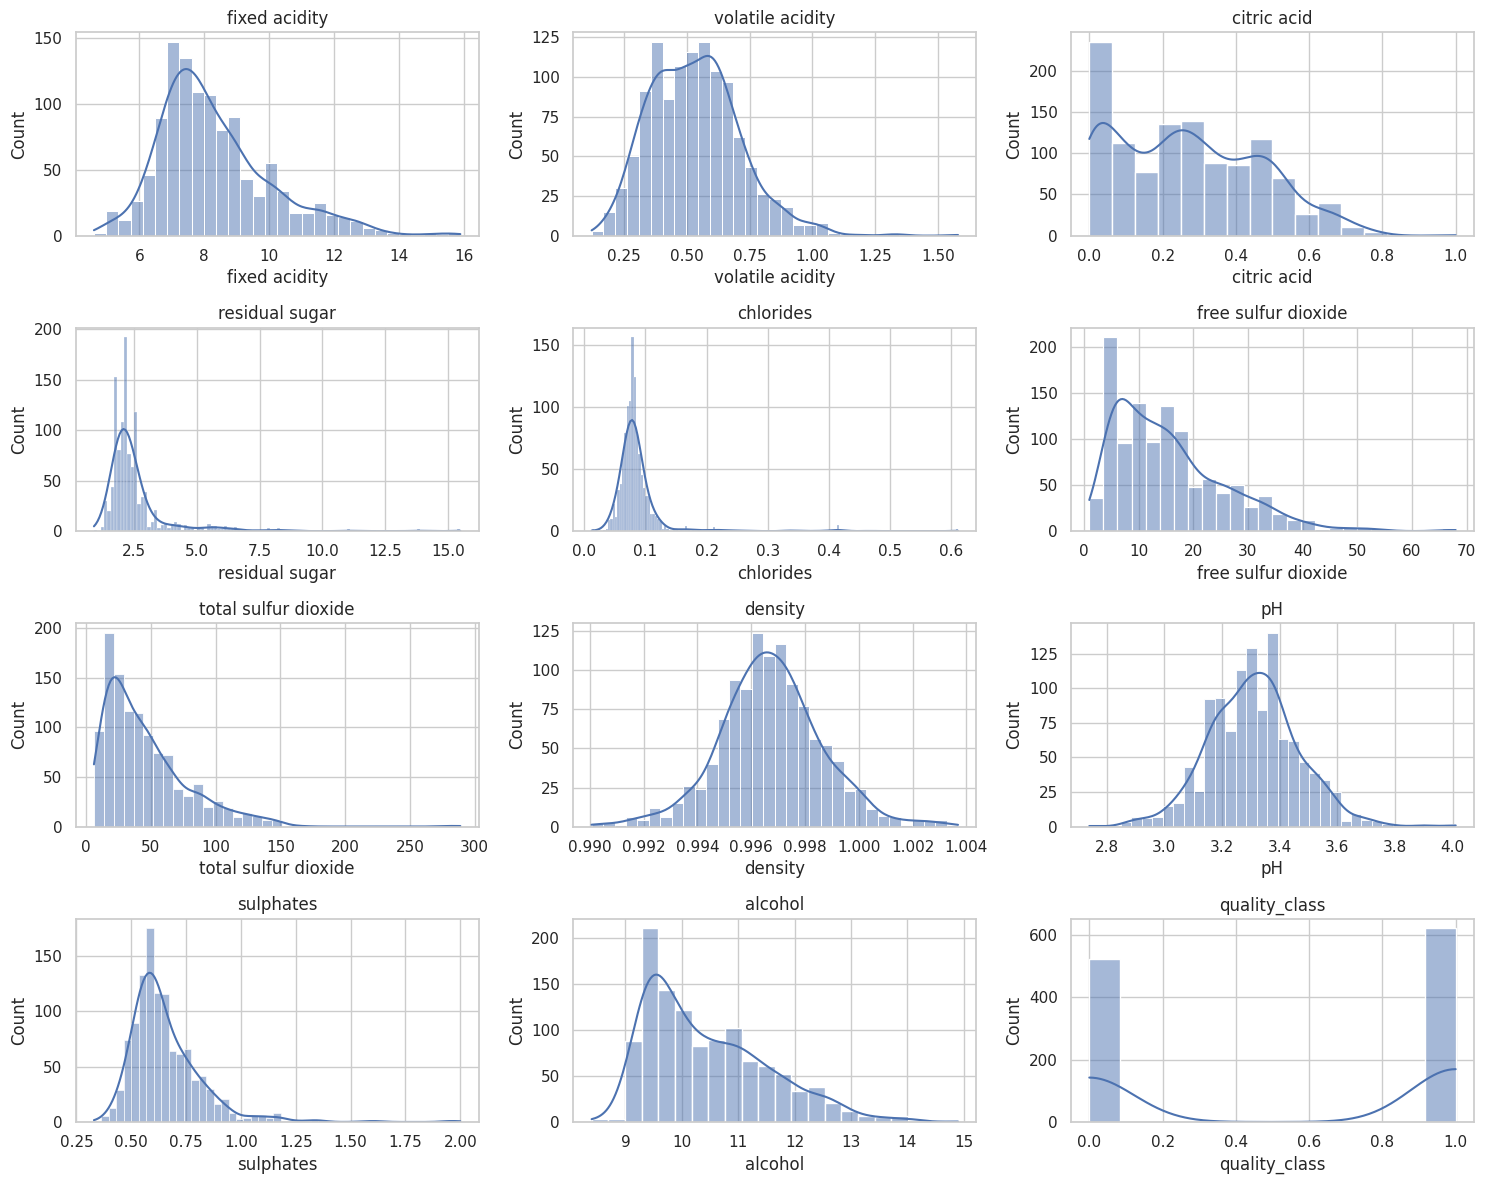

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(15, 12))

axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.histplot(df[column], kde=True, ax=axes[i], alpha=0.5)
    axes[i].set_title(column)

plt.tight_layout()

plt.show()

## Pairplots

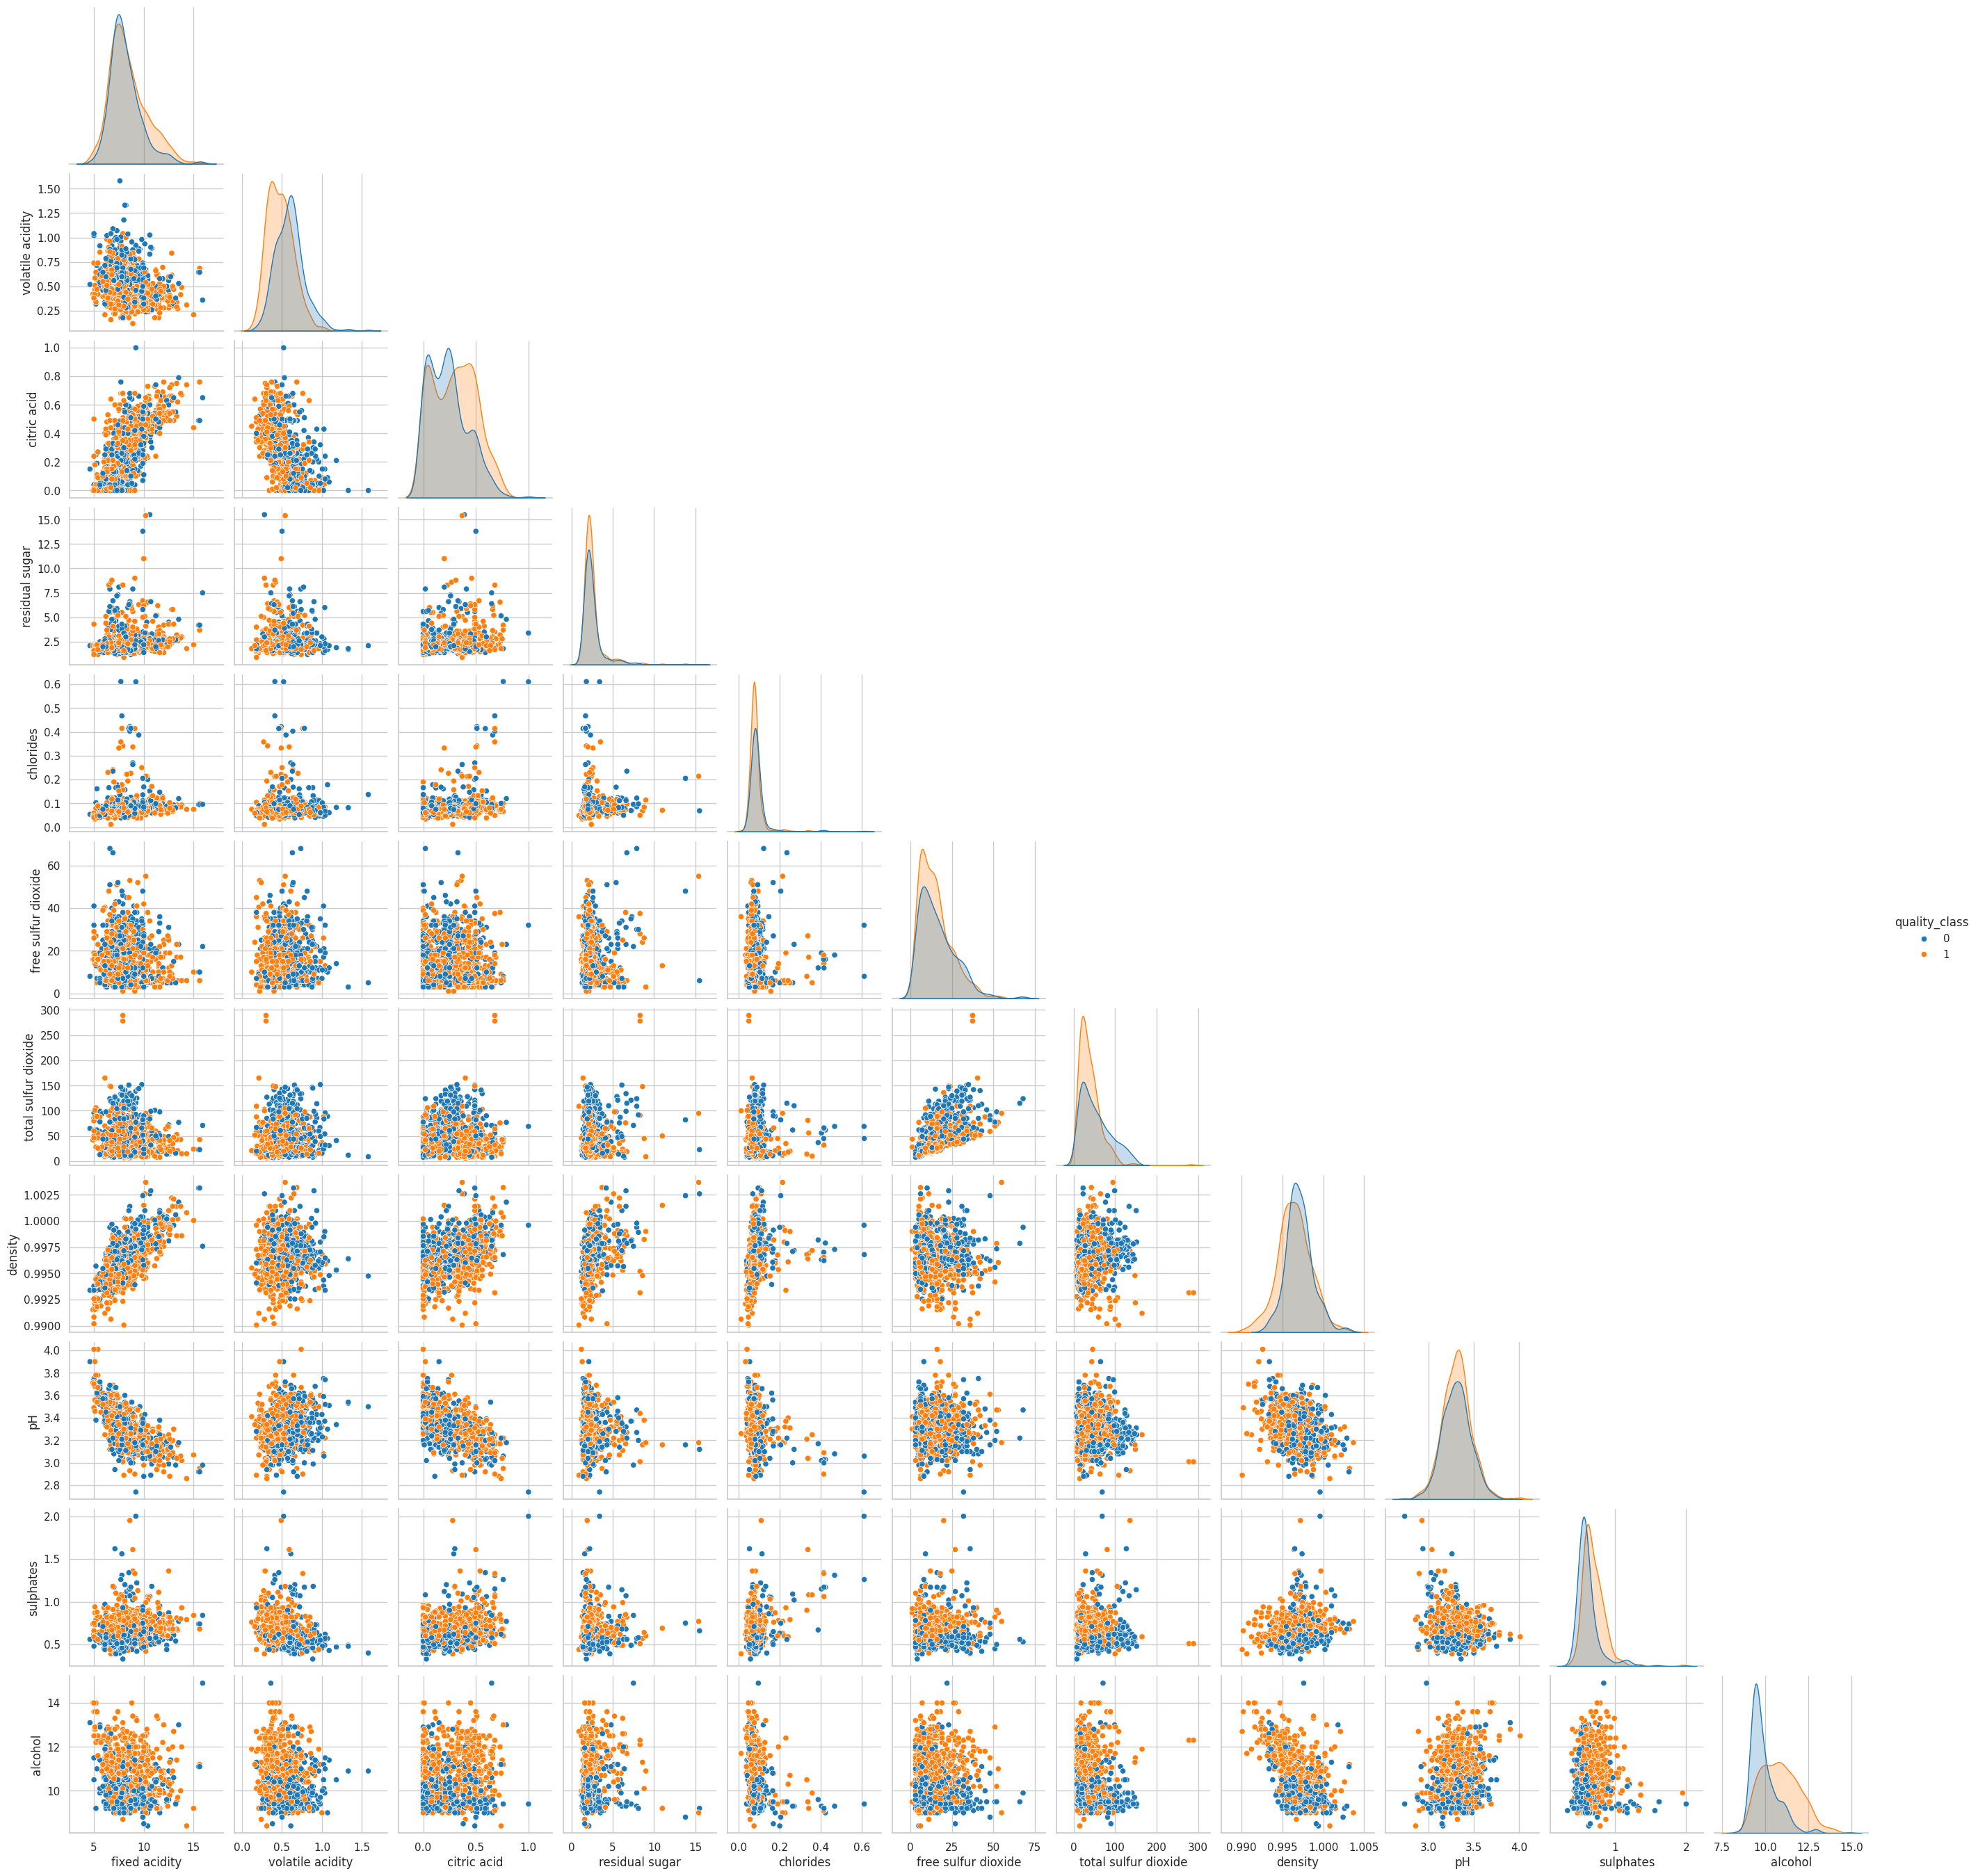

In [ ]:
sns.pairplot(df, hue='quality_class', corner=True, palette="tab10")
plt.show()